In [820]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD , Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [821]:
#pip install mlxtend  

In [822]:
df = pd.read_csv("F:/1.SecondSemester/Manufacturing/ManuData/Divide Excel File/ManuDataTest.csv")

In [823]:
nRow, nCol = df.shape # Shape gives the dimensions of data in thr form of rows and columns
print(nRow)
print(nCol)

9999
184


# Data Load ::

In [824]:
df.head() #Visualized the dataset

,mac,ip,plc_ip,glpi_ip,insert_datetime,insert_datetime.1,fanuc_seriesName,fanuc_autoState,fanuc_runState_now,fanuc_runState_past,...,adc_adc7,adc_adc8,dio_di1,dio_di2,dio_di3,dio_di4,dio_do1,dio_do2,dio_do3,dio_do4
0,D8BBC1555584,192.168.1.2,192.168.1.3,192.168.1.6,10/28/2022 14:41,Ethernet,Series 31i - MODEL B ( G40A-30.0 ),MEMORY,START,START,...,0,0,0,0,0,0,0,0,0,0
1,D8BBC1555584,192.168.1.2,192.168.1.3,192.168.1.6,10/28/2022 14:41,Ethernet,Series 31i - MODEL B ( G40A-30.0 ),MEMORY,START,START,...,0,0,0,0,0,0,0,0,0,0
2,D8BBC1555584,192.168.1.2,192.168.1.3,192.168.1.6,10/28/2022 14:41,Ethernet,Series 31i - MODEL B ( G40A-30.0 ),MEMORY,START,START,...,0,0,0,0,0,0,0,0,0,0
3,D8BBC1555584,192.168.1.2,192.168.1.3,192.168.1.6,10/28/2022 14:41,Ethernet,Series 31i - MODEL B ( G40A-30.0 ),MEMORY,START,START,...,0,0,0,0,0,0,0,0,0,0
4,D8BBC1555584,192.168.1.2,192.168.1.3,192.168.1.6,10/28/2022 14:41,Ethernet,Series 31i - MODEL B ( G40A-30.0 ),MEMORY,START,START,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning and Data-Preprocessing::
* The dataset contains few missing values which must be cleaned and curated to proceed with our analysis.The following data cleaning steps were performed on the dataset:
 
* Identifying the column containing missing values and Removing the unnecessary column

In [825]:
df.drop(['mac', 'ip', 'plc_ip', 'glpi_ip', 'insert_datetime', 'insert_datetime.1', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past', 'fanuc_alarm_no', 'fanuc_alarm_msg'], axis = 1, inplace = True)
#df.drop(['mac', 'ip', 'plc_ip', 'glpi_ip', 'insert_datetime', 'insert_datetime.1', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past'], axis = 1, inplace = True) 

In [826]:
cols = list(df)[1:184]  # This convert the column in the form of list.
cols

['fanuc_cycle_min',
 'fanuc_cycle_sec',
 'fanuc_rpm1',
 'fanuc_rpm1_unit',
 'fanuc_troq1',
 'fanuc_troq1_unit',
 'fanuc_gearRatio1',
 'fanuc_rpm2',
 'fanuc_rpm2_unit',
 'fanuc_troq2',
 'fanuc_troq2_unit',
 'fanuc_gearRatio2',
 'fanuc_rpm3',
 'fanuc_rpm3_unit',
 'fanuc_troq3',
 'fanuc_troq3_unit',
 'fanuc_gearRatio3',
 'fanuc_rpm4',
 'fanuc_rpm4_unit',
 'fanuc_troq4',
 'fanuc_troq4_unit',
 'fanuc_gearRatio4',
 'fanuc_toolNum',
 'fanuc_absoluteX',
 'fanuc_absoluteY',
 'fanuc_absoluteZ',
 'fanuc_relativeX',
 'fanuc_relativeY',
 'fanuc_relativeZ',
 'fanuc_machineX',
 'fanuc_machineY',
 'fanuc_machineZ',
 'fanuc_distanceX',
 'fanuc_distanceY',
 'fanuc_distanceZ',
 'ep1_vr1',
 'ep1_vs1',
 'ep1_vt1',
 'ep1_ar1',
 'ep1_as1',
 'ep1_at1',
 'ep1_activeR1',
 'ep1_activeS1',
 'ep1_activeT1',
 'ep1_activeTotal',
 'ep1_reactiveR1',
 'ep1_reactiveS1',
 'ep1_reactiveT1',
 'ep1_reactiveTotal',
 'ep1_apparentR1',
 'ep1_apparentS1',
 'ep1_apparentT1',
 'ep1_apparentTotal',
 'ep1_powerFactorR1',
 'ep1_powe

In [827]:
df.dtypes[1:10] # It checks the data types

fanuc_cycle_min     int64
fanuc_cycle_sec     int64
fanuc_rpm1          int64
fanuc_rpm1_unit     int64
fanuc_troq1         int64
fanuc_troq1_unit    int64
fanuc_gearRatio1    int64
fanuc_rpm2          int64
fanuc_rpm2_unit     int64
dtype: object

In [828]:
df

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,fanuc_rpm2,fanuc_rpm2_unit,...,adc_adc7,adc_adc8,dio_di1,dio_di2,dio_di3,dio_di4,dio_do1,dio_do2,dio_do3,dio_do4
0,0,19,52,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,19,53,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,19,54,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,19,55,1907,1,8,0,672,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,19,56,1918,1,0,0,672,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,56,51,0,1,0,0,648,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,56,52,1,1,24,0,712,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,56,53,139,1,15,0,712,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,56,54,0,1,0,0,712,0,0,...,0,0,0,0,0,0,0,0,0,0


In [829]:
null_values = df.isnull().sum() #identifying missing values and  # This function gives the information about Null values against each features
null_values[1:10]

fanuc_cycle_min     0
fanuc_cycle_sec     0
fanuc_rpm1          0
fanuc_rpm1_unit     0
fanuc_troq1         0
fanuc_troq1_unit    0
fanuc_gearRatio1    0
fanuc_rpm2          0
fanuc_rpm2_unit     0
dtype: int64

In [830]:
# df = pd.DataFrame(df)
# df.fillna(df.median())

# Convert categorical variable into integers

In [831]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):                                     #This function converts the catorigcal and string data into numerical values to 
    for c in df.columns:                                  #interperate easily.
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [832]:
df=labelencoder(df) #Here just calling the function of labelencoder and view data after encoding 
df      

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,fanuc_rpm2,fanuc_rpm2_unit,...,adc_adc7,adc_adc8,dio_di1,dio_di2,dio_di3,dio_di4,dio_do1,dio_do2,dio_do3,dio_do4
0,0,19,52,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,19,53,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,19,54,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,19,55,1907,1,8,0,672,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,19,56,1918,1,0,0,672,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,56,51,0,1,0,0,648,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,56,52,1,1,24,0,712,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,56,53,139,1,15,0,712,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,56,54,0,1,0,0,712,0,0,...,0,0,0,0,0,0,0,0,0,0


In [833]:
df.info(verbose=True) #Prints information of all columns(If verbose =False -> Prints a summary of columns count and its dtypes but not per column information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 172 columns):
 #    Column             Dtype  
---   ------             -----  
 0    fanuc_cycle_hour   int64  
 1    fanuc_cycle_min    int64  
 2    fanuc_cycle_sec    int64  
 3    fanuc_rpm1         int64  
 4    fanuc_rpm1_unit    int64  
 5    fanuc_troq1        int64  
 6    fanuc_troq1_unit   int64  
 7    fanuc_gearRatio1   int64  
 8    fanuc_rpm2         int64  
 9    fanuc_rpm2_unit    int64  
 10   fanuc_troq2        int64  
 11   fanuc_troq2_unit   int64  
 12   fanuc_gearRatio2   int64  
 13   fanuc_rpm3         int64  
 14   fanuc_rpm3_unit    int64  
 15   fanuc_troq3        int64  
 16   fanuc_troq3_unit   int64  
 17   fanuc_gearRatio3   int64  
 18   fanuc_rpm4         int64  
 19   fanuc_rpm4_unit    int64  
 20   fanuc_troq4        int64  
 21   fanuc_troq4_unit   int64  
 22   fanuc_gearRatio4   int64  
 23   fanuc_toolNum      int64  
 24   fanuc_absoluteX    float64
 

In [834]:
df.head()

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,fanuc_rpm2,fanuc_rpm2_unit,...,adc_adc7,adc_adc8,dio_di1,dio_di2,dio_di3,dio_di4,dio_do1,dio_do2,dio_do3,dio_do4
0,0,19,52,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,19,53,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,19,54,0,1,0,0,704,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,19,55,1907,1,8,0,672,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,19,56,1918,1,0,0,672,0,0,...,0,0,0,0,0,0,0,0,0,0


# The describe() method returns description of the data in the DataFrame.

* If the DataFrame contains numerical data, the description contains these information for each column:

* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

* Percentile meaning: how many of the values are less than the given percentile

In [835]:
df.describe()

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,fanuc_rpm2,fanuc_rpm2_unit,...,adc_adc7,adc_adc8,dio_di1,dio_di2,dio_di3,dio_di4,dio_do1,dio_do2,dio_do3,dio_do4
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.000000,9999.0,9999.000000,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,0.062506,29.655966,29.455546,2356.290829,1.0,5.731773,0.0,677.599760,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.242085,17.397195,17.353346,1761.657514,0.0,14.242873,0.0,14.068653,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,640.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,15.000000,14.000000,1150.000000,1.0,0.000000,0.0,672.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,31.000000,29.000000,1995.000000,1.0,2.000000,0.0,672.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,45.000000,45.000000,3836.000000,1.0,5.000000,0.0,680.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,59.000000,59.000000,5220.000000,1.0,147.000000,0.0,712.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Scaling

In [836]:
X=df

In [837]:
cols = X.columns

In [838]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [839]:
X = pd.DataFrame(X, columns=[cols])

In [840]:
X.head()

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,fanuc_rpm2,fanuc_rpm2_unit,...,adc_adc7,adc_adc8,dio_di1,dio_di2,dio_di3,dio_di4,dio_do1,dio_do2,dio_do3,dio_do4
0,0.0,0.322034,0.881356,0.000000,0.0,0.000000,0.0,0.888889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.322034,0.898305,0.000000,0.0,0.000000,0.0,0.888889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.322034,0.915254,0.000000,0.0,0.000000,0.0,0.888889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.322034,0.932203,0.365326,0.0,0.054422,0.0,0.444444,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.322034,0.949153,0.367433,0.0,0.000000,0.0,0.444444,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# K-Means model with two clusters

In [841]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters = 2)
 
label = kmeans.fit_predict(X)
X["cluster"]=label

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


# K-Means model parameters details

* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

* The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

* The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

In [842]:
kmeans.cluster_centers_

array([[0.04473406, 0.51547155, 0.49014633, 0.52401364, 0.        ,
        0.03983869, 0.        , 0.46985767, 0.        , 0.        ,
        0.        , 0.        , 0.48872797, 0.        , 0.        ,
        0.        , 0.        , 0.47023023, 0.        , 0.        ,
        0.        , 0.        , 0.50228509, 0.        , 0.49419382,
        0.25053633, 0.18617917, 0.50680356, 0.34104706, 0.31329566,
        0.50680351, 0.3410475 , 0.3132935 , 0.50169623, 0.52832121,
        0.49384835, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

# Inertia
* Inertia is not a normalized metric.

* The lower values of inertia are better and zero is optimal.

* But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

* Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

* We can calculate model inertia as follows:-

In [843]:
kmeans.inertia_  # The lesser the model inertia, the better the model fit. 
                 # We can see that the model has very high inertia. So, this is not a good model fit to the data.

7052.015327650466

In [870]:
print("Labels", kmeans.labels_)

Labels [1 1 1 ... 1 1 1]


In [851]:
X=dataFrame
dataFrame

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,fanuc_rpm2,fanuc_rpm2_unit,...,adc_adc8,dio_di1,dio_di2,dio_di3,dio_di4,dio_do1,dio_do2,dio_do3,dio_do4,cluster
0,0.0,0.322034,0.881356,0.000000,0.0,0.000000,0.0,0.888889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.322034,0.898305,0.000000,0.0,0.000000,0.0,0.888889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.322034,0.915254,0.000000,0.0,0.000000,0.0,0.888889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.322034,0.932203,0.365326,0.0,0.054422,0.0,0.444444,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.322034,0.949153,0.367433,0.0,0.000000,0.0,0.444444,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0,0.949153,0.864407,0.000000,0.0,0.000000,0.0,0.111111,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9995,0.0,0.949153,0.881356,0.000192,0.0,0.163265,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9996,0.0,0.949153,0.898305,0.026628,0.0,0.102041,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9997,0.0,0.949153,0.915254,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


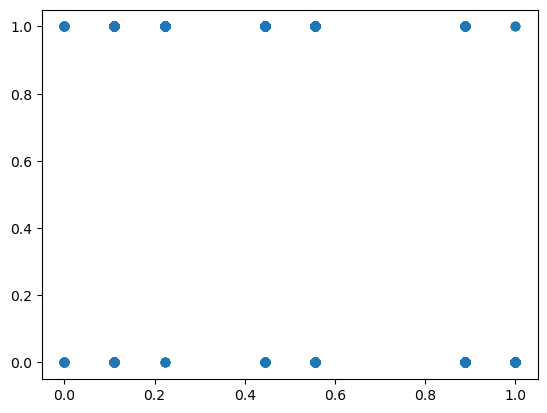

In [852]:
x=dataFrame["fanuc_gearRatio1"]
y=dataFrame['cluster']

plt.scatter(x, y)
plt.show()

In [853]:
Labels=dataFrame['cluster']                        # It take cluster column as a targeted label.
dataX=dataFrame.drop('cluster',axis=1)             #It drop the cluster column and consider all other values .

C:\Users\Imtiyaj\AppData\Local\Temp\ipykernel_13340\1877325383.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dataX=dataFrame.drop('cluster',axis=1)             #It drop the cluster column and consider all other values .


# Handle Missing Values or NAN values

In [854]:
from sklearn.impute import SimpleImputer                                         #SimpleImputer  help to filed the missing 
                                                                                   # or non-values  using means or median.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(dataX)
X = imputer.transform(dataX)

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


# Feature Selection
* Bruta or RFE are used as a feature selection method, It select useful features and drop less useful features.

In [855]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(max_depth=1) #For Boruta
from boruta import BorutaPy
feat_selector = BorutaPy(model, n_estimators='auto', verbose=1, random_state=101)
feat_selector.fit(X,Labels)
print(feat_selector.support_)  #Should we accept the featur
print(feat_selector.ranking_) #Rank 1 is the best
X_filtered1 = feat_selector.transform(X)  #Apply feature selection and return transformed data

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 1 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 2 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 3 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 4 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 5 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 6 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 7 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 8 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 9 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 10 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 11 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 12 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 13 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 14 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 15 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 16 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 17 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 18 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 19 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 20 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 21 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 22 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 23 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 24 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 25 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 26 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 27 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 28 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 29 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 30 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 31 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 32 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 33 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 34 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 35 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 36 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 37 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 38 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 39 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 40 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 41 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 42 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 43 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 44 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 45 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 46 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 47 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 48 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 49 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 50 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 51 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 52 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 53 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 54 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 55 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 56 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 57 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 58 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 59 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 60 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 61 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 62 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 63 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 64 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 65 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 66 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 67 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 68 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 69 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 70 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 71 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 72 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 73 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 74 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 75 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 76 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 77 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 78 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 79 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 80 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 81 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 82 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 83 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 84 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 85 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 86 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 87 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 88 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 89 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 90 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 91 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 92 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 93 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 94 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 95 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 96 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 97 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 98 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 99 / 100


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	20
Tentative: 	1
Rejected: 	151
[ True  True False  True False  True False  True False False False False
  True False False False False  True False False False False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False F

In [858]:
Final_selected=X_filtered1

In [859]:
from sklearn.preprocessing import MinMaxScaler

Final_selected =  (Final_selected - Final_selected.mean()) / Final_selected.std()
scaler = MinMaxScaler(feature_range=(0, 1))                        #Again, It normalized the whole dataset between 0 and 1.
Final_selected = scaler.fit_transform(Final_selected)

In [860]:
#This step divided the whole dataset into training and testing by keeping test size 20%

X_train, X_test,y_train, y_test = train_test_split(Final_selected,Labels, test_size=0.20,random_state=9)

In [861]:
print('training features =',X_train.shape)
print('testing features   =',y_train.shape)
print('training labels=',X_test.shape)
print('testing labels =',y_test.shape)

training features = (7999, 20)
testing features   = (7999, 1)
training labels= (2000, 20)
testing labels = (2000, 1)


# RandomForest (RF)

In [878]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100)       
modelRF.fit(X_train, y_train)
prediction = modelRF.predict(X_test)
s7=accuracy_score(y_test,prediction)
print(classification_report(y_test, prediction))
print("RF Accuracy :", "{:.2f}%".format(100*s7))
print(confusion_matrix(y_test, prediction))

C:\Users\Imtiyaj\AppData\Local\Temp\ipykernel_13340\3555883167.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       287
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000

RF Accuracy : 99.85%
[[ 284    3]
 [   0 1713]]


In [874]:
# plot_confusion_matrix(modelRF, X_test, y_test, cmap = 'Blues')
# plt.grid(False)

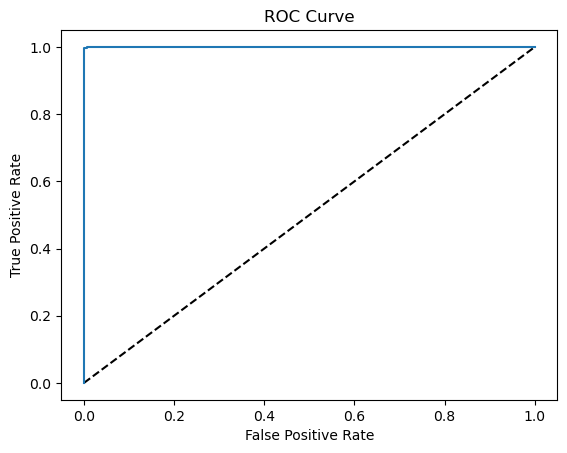

In [866]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = modelRF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# SVM

In [882]:
from sklearn.svm import SVC
from sklearn import svm
#model = svm.LinearSVC(multi_class="ovr")
modelSVM = svm.SVC(kernel='rbf', gamma=7.9, C=20, decision_function_shape='ovo')
modelSVM.fit(X_train, y_train)
prediction = modelSVM.predict(X_test)
s7=accuracy_score(y_test,prediction)
print(classification_report(y_test, prediction))
print("SVM Accuracy :", "{:.2f}%".format(100*s7))
print(confusion_matrix(y_test, prediction))

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       287
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

SVM Accuracy : 99.60%
[[ 280    7]
 [   1 1712]]
